In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# 1) Cargar el dataset Breast Cancer Wisconsin
data = load_breast_cancer()

# 2) Pasar a DataFrame para trabajar cómodo
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")  # 0 = malignant, 1 = benign

# 3) Unir para una vista rápida
df = X.copy()
df["target"] = y.map({0: "malignant", 1: "benign"})

# 4) Chequeos rápidos
print("Shape (filas, columnas):", df.shape)
print("\nClases y cantidades:")
print(df["target"].value_counts())

print("\nPrimeras filas:")
display(df.head())

print("\n¿Valores faltantes totales?:", int(df.isna().sum().sum()))


Shape (filas, columnas): (569, 31)

Clases y cantidades:
target
benign       357
malignant    212
Name: count, dtype: int64

Primeras filas:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant



¿Valores faltantes totales?: 0


In [3]:
from sklearn.model_selection import train_test_split

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (455, 30)
Tamaño prueba: (114, 30)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear modelo KNN con k=5 (valor inicial)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Predecir en test
y_pred_knn = knn.predict(X_test)

# Evaluar precisión
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Precisión KNN (k=5):", acc_knn)


Precisión KNN (k=5): 0.9122807017543859


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Crear modelo Árbol de Decisión (profundidad máxima = 3)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenar el modelo
tree.fit(X_train, y_train)

# Predecir en test
y_pred_tree = tree.predict(X_test)

# Evaluar precisión
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Precisión Árbol de Decisión (max_depth=3):", acc_tree)


Precisión Árbol de Decisión (max_depth=3): 0.9385964912280702


In [6]:
# Comparación de resultados
resultados = pd.DataFrame({
    "Modelo": ["KNN (k=5)", "Árbol de Decisión (max_depth=3)"],
    "Precisión": [acc_knn, acc_tree]
})

display(resultados)


,Modelo,Precisión
0,KNN (k=5),0.912281
1,Árbol de Decisión (max_depth=3),0.938596


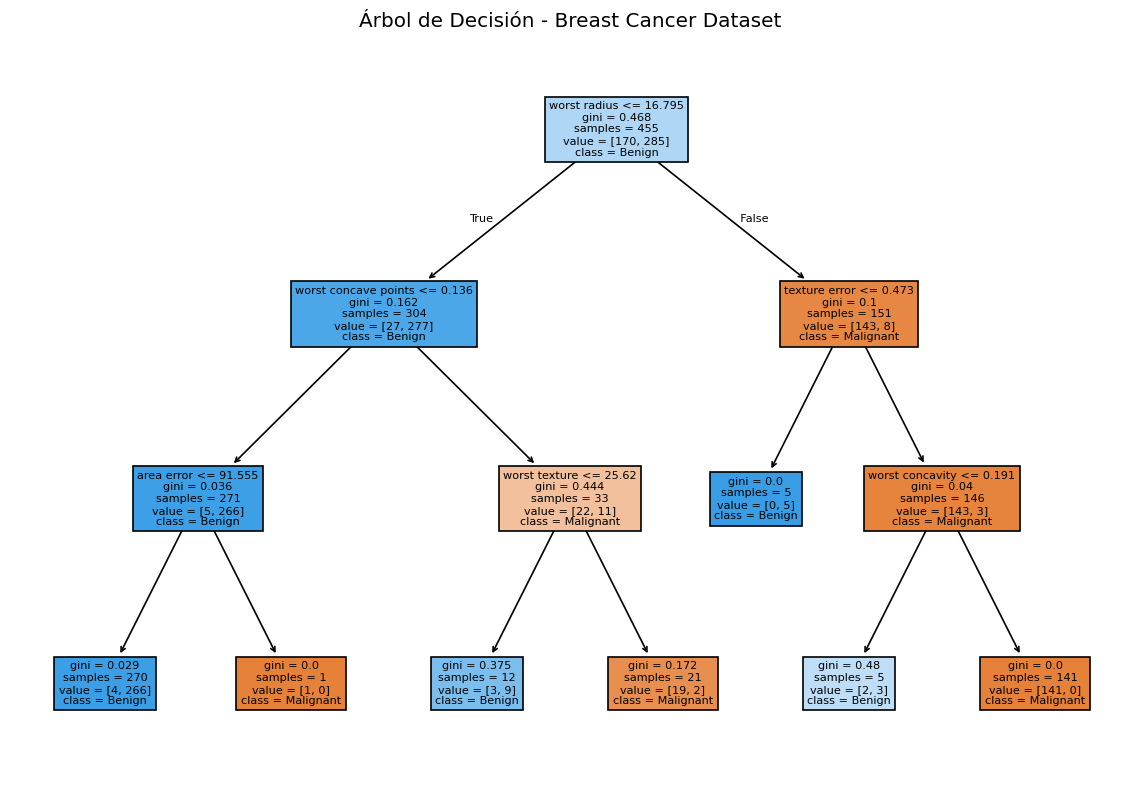

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_tree.fit(X_train, y_train)

# 2) Graficar el árbol como en el PDF
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8), dpi=120)
plot_tree(
    clf_tree,
    feature_names=list(X.columns),
    class_names=["Malignant", "Benign"],
    filled=True
)
plt.title("Árbol de Decisión - Breast Cancer Dataset")
plt.show()

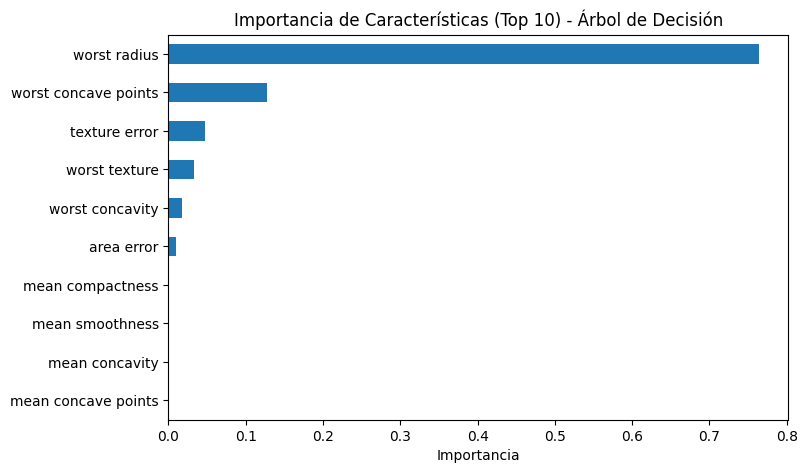

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(clf_tree.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

plt.figure(figsize=(8,5))
importances.plot(kind="barh")
plt.title("Importancia de Características (Top 10) - Árbol de Decisión")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()